In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [3]:
sns.set_theme(style="darkgrid")


In [8]:
data = {
    "abstract":{
        "t5":{
            "1":63.5,
            "2":50.34,
            "l":52.01,
        },
        "pegasus":{
            "1":71.89,
            "2":53.25,
            "l":64.02,
        },
        "pegasus_fine-tuned":{
            "1":73.48,
            "2":56.74,
            "l":66.66,
        }
    },
    "body":{
        "t5":{
            "1":23.25,
            "2":6.44,
            "l":19.09,
        },
        "pegasus":{
            "1":39.38,
            "2":16.48,
            "l":24.03,
        },
        "pegasus_fine-tuned":{
            "1":40.27,
            "2":17.72,
            "l":25.42,
        }
    },
    "body_quality":{
        "t5":{
            "1":42.86,
            "2":22.41,
            "l":32.1,
        },
        "pegasus":{
            "1":46.86,
            "2":15.95,
            "l":28.12,
        },
        "pegasus_fine-tuned":{
            "1":46.88,
            "2":16.04,
            "l":28.1,
        }
    },
    "body_quality_25":{
        "t5":{
            "1":37.74,
            "2":19.32,
            "l":28.4
        },
        "pegasus":{
            "1":46.89,
            "2":16.06,
            "l":28.27,
        },
        "pegasus_fine-tuned":{
            "1":41.7,
            "2":9.35,
            "l":22.75,
        }
    },
    "body_quality_50":{
        "t5":{
            "1":38.06,
            "2":18.64,
            "l":28.3
        },
        "pegasus":{
            "1":42.02,
            "2":9.67,
            "l":23.85,
        },
        "pegasus_fine-tuned":{
            "1":41.53,
            "2":9.55,
            "l":23.32,
        }
    },
    "body_quality_100":{
        "t5":{
            "1":40.73,
            "2":20.46,
            "l":30.2
        },
        "pegasus":{
            "1":44.08,
            "2":11.91,
            "l":25.28,
        },
        "pegasus_fine-tuned":{
            "1":43.56,
            "2":11.91,
            "l":24.86,
        }
    },
    "body_quality_200":{
        "t5":{
            "1":40.48,
            "2":20.02,
            "l":29.8,
        },
        "pegasus":{
            "1":46.12,
            "2":14.72,
            "l":27.73,
        },
        "pegasus_fine-tuned":{
            "1":45.94,
            "2":14.66,
            "l":27.39,
        }
    },
    "body_quality_300":{
        "t5":{
            "1":26.97,
            "2":9.6,
            "l":18.28,
        },
        "pegasus":{
            "1":44.08,
            "2":11.91,
            "l":25.28,
        },
        "pegasus_fine-tuned":{
            "1":46.8,
            "2":16.18,
            "l":28.12,
        }
    }
}

In [18]:
rouge1 = {}
rouge2 = {}
rougeL = {}

def extract2list(data, key="l"):
    d = {}
    for task in data:
        for model in data[task]:
            if model not in d:
                d[model] = []
            d[model].append(data[task][model][key])
    return d

keys = [k for k in data]
rouge1 = extract2list(data, key="1")
rouge2 = extract2list(data, key="2")
rougeL = extract2list(data, key="l")

In [19]:
print(keys)
for k in rougeL:
    print(k, rougeL[k])

['abstract', 'body', 'body_quality', 'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300']
t5 [52.01, 19.09, 32.1, 28.4, 28.3, 30.2, 29.8, 18.28]
pegasus [64.02, 24.03, 28.12, 28.27, 23.85, 25.28, 27.73, 25.28]
pegasus_fine-tuned [66.66, 25.42, 28.1, 22.75, 23.32, 24.86, 27.39, 28.12]


In [53]:
#body vs body quality
#show the improvement in rouge scores from simple body, to body quality
def extract_keys(lst, keys, keys2keep=["body","body_quality"]):
    indices = []
    for k in keys2keep:
        indices.append(keys.index(k))
    indices = set(indices)
    new_lst = []
    for i in range(len(lst)):
        if i in indices:
            new_lst.append(lst[i])
    return new_lst

#data for comparing body quality vs no treatment
rouge1_body = {}
rouge2_body = {}
rougeL_body = {}

for k in rougeL:
    lst = extract_keys(rouge1[k], keys, keys2keep=["body","body_quality"])
    rouge1_body[k] = lst
    
    lst = extract_keys(rouge2[k], keys, keys2keep=["body","body_quality"])
    rouge2_body[k] = lst
    
    lst = extract_keys(rougeL[k], keys, keys2keep=["body","body_quality"])
    rougeL_body[k] = lst

    
print(["body","body_quality"])
for k in rougeL:
    print(k, rougeL_body[k])
    

['body', 'body_quality']
t5 [19.09, 32.1]
pegasus [24.03, 28.12]
pegasus_fine-tuned [25.42, 28.1]


In [54]:
#full body vs top sentences
#data for comparing body quality vs no treatment
rouge1_s = {}
rouge2_s = {}
rougeL_s = {}

for k in rougeL:
    lst = extract_keys(rouge1[k], keys, keys2keep=["body",'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300',"body_quality"])
    rouge1_s[k] = lst
    
    lst = extract_keys(rouge2[k], keys, keys2keep=["body",'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300',"body_quality"])
    rouge2_s[k] = lst
    
    lst = extract_keys(rougeL[k], keys, keys2keep=["body",'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300',"body_quality"])
    rougeL_s[k] = lst

print(["body",'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300',"body_quality"])
for k in rougeL:
    print(k, rougeL_s[k])

['body', 'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300', 'body_quality']
t5 [19.09, 32.1, 28.4, 28.3, 30.2, 29.8, 18.28]
pegasus [24.03, 28.12, 28.27, 23.85, 25.28, 27.73, 25.28]
pegasus_fine-tuned [25.42, 28.1, 22.75, 23.32, 24.86, 27.39, 28.12]


## Figures

<AxesSubplot:xlabel='x', ylabel='value'>

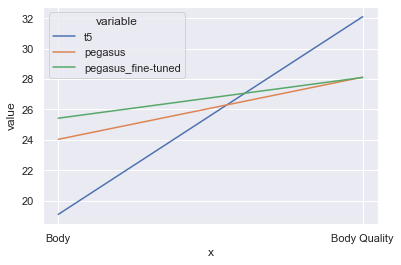

In [55]:
## body vs Body with quality
x = {"x":["Body","Body Quality"]}
for k in rougeL_body:
    x[k] = rougeL_body[k]
df = pd.DataFrame(x)
sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))

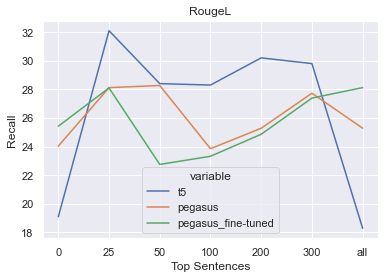

In [67]:
#rouge L
#plot number of top sentences
x = {"x":["0","25", '50', '100', '200', '300',"all"]}
for k in rougeL_s:
    x[k] = rougeL_s[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(xlabel='Top Sentences', ylabel='Recall', title="RougeL")
plt.show()

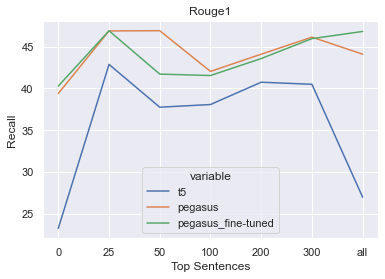

In [66]:
x = {"x":["0","25", '50', '100', '200', '300',"all"]}
for k in rouge1_s:
    x[k] = rouge1_s[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(xlabel='Top Sentences', ylabel='Recall', title="Rouge1")
plt.show()

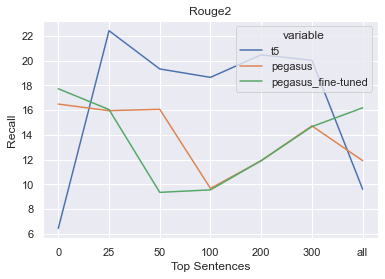

In [65]:
x = {"x":["0","25", '50', '100', '200', '300',"all"]}
for k in rouge2_s:
    x[k] = rouge2_s[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(xlabel='Top Sentences', ylabel='Recall', title="Rouge2")
plt.show()


## Figures just comparing pegasus


In [70]:
ignore_set = set(["t5"])

<AxesSubplot:xlabel='x', ylabel='value'>

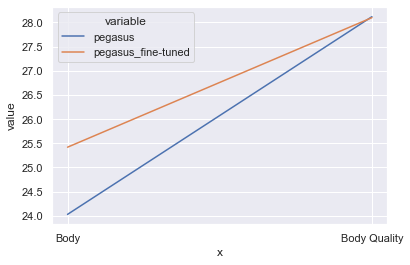

In [71]:
## body vs Body with quality
x = {"x":["Body","Body Quality"]}
for k in rougeL_body:
    if k in ignore_set:
        continue
    x[k] = rougeL_body[k]
df = pd.DataFrame(x)
sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))

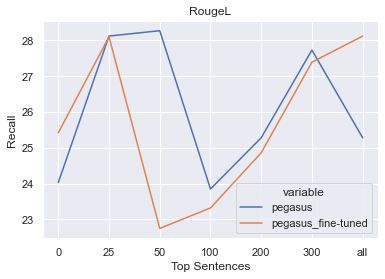

In [72]:
#rouge L
#plot number of top sentences
x = {"x":["0","25", '50', '100', '200', '300',"all"]}
for k in rougeL_s:
    if k in ignore_set:
        continue
    x[k] = rougeL_s[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(xlabel='Top Sentences', ylabel='Recall', title="RougeL")
plt.show()

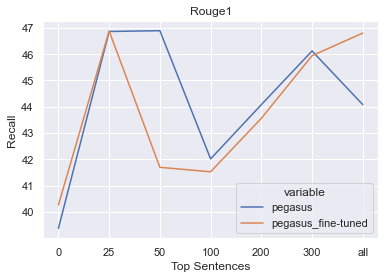

In [73]:
x = {"x":["0","25", '50', '100', '200', '300',"all"]}
for k in rouge1_s:
    if k in ignore_set:
        continue
    x[k] = rouge1_s[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(xlabel='Top Sentences', ylabel='Recall', title="Rouge1")
plt.show()

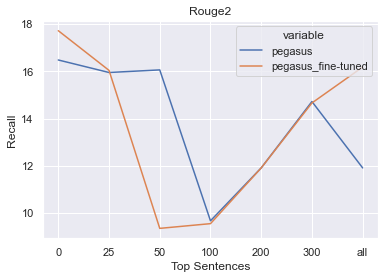

In [76]:
x = {"x":["0","25", '50', '100', '200', '300',"all"]}
for k in rouge2_s:
    if k in ignore_set:
        continue
    x[k] = rouge2_s[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(xlabel='Top Sentences', ylabel='Recall', title="Rouge2")
plt.show()

## Pull data from scores tables

In [109]:
ignore_set = set(["t5"])

In [84]:
d = {}
with open("./data/scores_tables/scores_table.pkl", "rb") as f:
    d = pickle.load(f)

In [85]:
d

,t5,pegasus,pegasus_fine-tuned
abstract,63.5 / 50.34 / 52.01,71.89 / 53.25 / 64.02,73.48 / 56.74 / 66.66
body,23.25 / 6.44 / 19.09,39.38 / 16.48 / 24.03,40.27 / 17.72 / 25.42
body_quality,42.86 / 22.41 / 32.14,46.86 / 15.95 / 28.12,46.88 / 16.04 / 28.1
body_quality_import_25,37.74 / 19.32 / 28.42,41.57 / 9.22 / 22.83,41.7 / 9.35 / 22.75
body_quality_import_50,38.06 / 18.64 / 28.39,42.02 / 9.67 / 23.85,41.53 / 9.55 / 23.32
body_quality_import_100,40.73 / 20.46 / 30.29,44.08 / 11.91 / 25.28,43.56 / 11.91 / 24.86
body_quality_import_200,40.48 / 20.02 / 29.88,46.12 / 14.72 / 27.73,45.94 / 14.66 / 27.39
body_quality_import_300,26.97 / 9.6 / 18.28,46.89 / 16.06 / 28.27,46.8 / 16.18 / 28.12


In [107]:
keys = ["abstract", "body", "body_quality", 'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300']


rouge1 = {"t5":[],"pegasus":[],"pegasus_ft":[]}
rouge2 = {"t5":[],"pegasus":[],"pegasus_ft":[]}
rougeL = {"t5":[],"pegasus":[],"pegasus_ft":[]}


def result2floats(s):
    lst = []
    a = s.strip().split("/")
    for x in a:
        lst.append(float(x))
    return lst

def extract2lists(data):
    for i,(index, row) in enumerate(data.iterrows()):
        task = keys[i]
        t5 = result2floats(row["t5"])
        pegasus = result2floats(row["pegasus"])
        pegasus_ft = result2floats(row["pegasus_fine-tuned"])
        
        
        rouge1["t5"].append(t5[0])
        rouge1["pegasus"].append(pegasus[0])
        rouge1["pegasus_ft"].append(pegasus_ft[0])
        
        rouge2["t5"].append(t5[1])
        rouge2["pegasus"].append(pegasus[1])
        rouge2["pegasus_ft"].append(pegasus_ft[1])
        
        rougeL["t5"].append(t5[2])
        rougeL["pegasus"].append(pegasus[2]) 
        rougeL["pegasus_ft"].append(pegasus_ft[2])
        
        #print(row["t5"], row["pegasus"], row["pegasus_fine-tuned"])
    

keys = [k for k in data]
extract2lists(d)

print(keys)
for k in rouge1:
    print(k, rouge1[k])


['abstract', 'body', 'body_quality', 'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300']
t5 [63.5, 23.25, 42.86, 37.74, 38.06, 40.73, 40.48, 26.97]
pegasus [71.89, 39.38, 46.86, 41.57, 42.02, 44.08, 46.12, 46.89]
pegasus_ft [73.48, 40.27, 46.88, 41.7, 41.53, 43.56, 45.94, 46.8]


In [122]:
#body vs body quality
#show the improvement in rouge scores from simple body, to body quality
def extract_keys(lst, keys, keys2keep=["body","body_quality"]):
    indices = []
    for k in keys2keep:
        indices.append(keys.index(k))
    indices = set(indices)
    new_lst = []
    for i in range(len(lst)):
        if i in indices:
            new_lst.append(lst[i])
    return new_lst

#data for comparing body quality vs no treatment
rouge1_body = {}
rouge2_body = {}
rougeL_body = {}

for k in rougeL:
    lst = extract_keys(rouge1[k], keys, keys2keep=["body","body_quality"])
    rouge1_body[k] = lst
    
    lst = extract_keys(rouge2[k], keys, keys2keep=["body","body_quality"])
    rouge2_body[k] = lst
    
    lst = extract_keys(rougeL[k], keys, keys2keep=["body","body_quality"])
    rougeL_body[k] = lst

    
print(["body","body_quality"])
for k in rougeL:
    print(k, rougeL_body[k])
    

['body', 'body_quality']
t5 [19.09, 32.14]
pegasus [24.03, 28.12]
pegasus_ft [25.42, 28.1]


In [125]:
#full body vs top sentences
#data for comparing body quality vs no treatment
rouge1_s = {}
rouge2_s = {}
rougeL_s = {}

for k in rougeL:
    lst = extract_keys(rouge1[k], keys, keys2keep=["body",'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300',"body_quality"])
    rouge1_s[k] = lst
    
    lst = extract_keys(rouge2[k], keys, keys2keep=["body",'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300',"body_quality"])
    rouge2_s[k] = lst
    
    lst = extract_keys(rougeL[k], keys, keys2keep=["body",'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300',"body_quality"])
    rougeL_s[k] = lst

print(["body",'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300',"body_quality"])
for k in rougeL:
    print(k, rougeL_s[k])

['body', 'body_quality_25', 'body_quality_50', 'body_quality_100', 'body_quality_200', 'body_quality_300', 'body_quality']
t5 [19.09, 32.14, 28.42, 28.39, 30.29, 29.88, 18.28]
pegasus [24.03, 28.12, 22.83, 23.85, 25.28, 27.73, 28.27]
pegasus_ft [25.42, 28.1, 22.75, 23.32, 24.86, 27.39, 28.12]


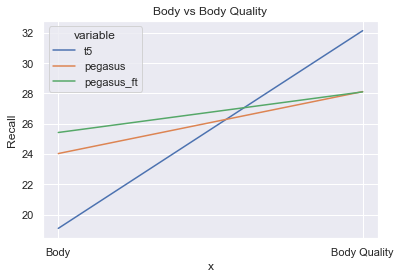

In [126]:
## body vs Body with quality
x = {"x":["Body","Body Quality"]}
for k in rougeL_body:
    x[k] = rougeL_body[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(ylabel='Recall', title="Body vs Body Quality")
plt.show()

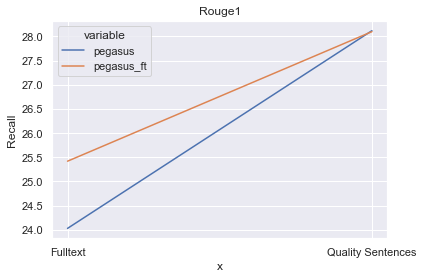

In [127]:
## body vs Body with quality
x = {"x":["Fulltext","Quality Sentences"]}
for k in rougeL_body:
    if k in ignore_set:
        continue
    x[k] = rougeL_body[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(ylabel='Recall', title="Rouge1")
plt.show()

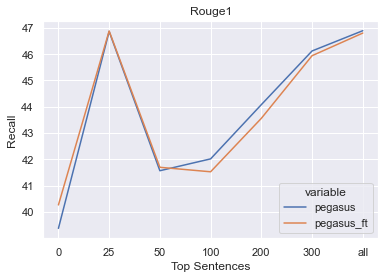

In [128]:
x = {"x":["0","25", '50', '100', '200', '300',"all"]}
for k in rouge1_s:
    if k in ignore_set:
        continue
    x[k] = rouge1_s[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(xlabel='Top Sentences', ylabel='Recall', title="Rouge1")
plt.show()

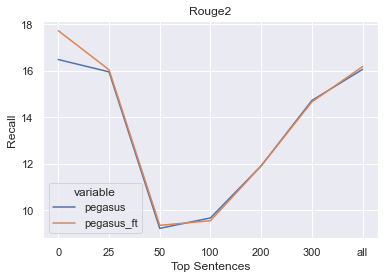

In [129]:
x = {"x":["0","25", '50', '100', '200', '300',"all"]}
for k in rouge2_s:
    if k in ignore_set:
        continue
    x[k] = rouge2_s[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(xlabel='Top Sentences', ylabel='Recall', title="Rouge2")
plt.show()

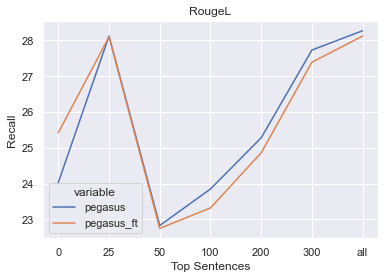

In [130]:
#rouge L
#plot number of top sentences
x = {"x":["0","25", '50', '100', '200', '300',"all"]}
for k in rougeL_s:
    if k in ignore_set:
        continue
    x[k] = rougeL_s[k]
df = pd.DataFrame(x)
ax = sns.lineplot(x='x', y='value', hue='variable', 
             data=pd.melt(df, ['x']))
ax.set(xlabel='Top Sentences', ylabel='Recall', title="RougeL")
plt.show()